<a href="https://colab.research.google.com/github/Reetabisht/Ricegrain_classification_using_deeplearning/blob/main/Reeta_Rice_grain_colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Rice Image Dataset

### Problem Statement
Build a Deep Learning Neural Network to identify variety of rice with Maximum Accuracy

### Dataset Information
Rice, which is among the most widely produced grain products worldwide, has many genetic varieties. These varieties are separated from each other due to some of their features. These are usually features such as texture, shape, and color. With these features that distinguish rice varieties, it is possible to classify and evaluate the quality of seeds.In this study Five Vriety of Rice is used are named as below.
* Arborio
* Basmati 
* Ipsala 
* Jasmine
* Karacadag

A total of 75,000 grain images, 15,000 from each of these varieties, are included in the dataset. 

In [ ]:
# Installing Tensoflow for Convoluted Neural Network

In [ ]:
pip install tensorflow

Defaulting to user installation because normal site-packages is not writeable
  Using cached tensorflow-2.12.0-cp310-cp310-win_amd64.whl (1.9 kB)
  Using cached tensorflow_intel-2.12.0-cp310-cp310-win_amd64.whl (272.8 MB)
     ---------------------------------------- 1.2/1.2 MB 6.6 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Using cached flatbuffers-23.3.3-py2.py3-none-any.whl (26 kB)
  Using cached tensorflow_estimator-2.12.0-py2.py3-none-any.whl (440 kB)
  Using cached keras-2.12.0-py2.py3-none-any.whl (1.7 MB)
  Using cached google_pasta-0.2.0-py3-none-any.whl (57 kB)
  Using cached opt_einsum-3.3.0-py3-none-any.whl (65 kB)
  Using cached protobuf-4.22.1-cp310-abi3-win_amd64.whl (420 kB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl (12 kB)
  Using cached gast-0.4.0-py3-none-any.whl (9.8 kB)
  Using cached absl_py-1.4.0-py3-none-any.whl (126 kB)
     ---------------------------------------- 3.9/3.9 M

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [ ]:
import tensorflow as tf

print("TF version:", tf.__version__)


TF version: 2.12.0


In [ ]:
# First we will mount our google drive on colab so that we can use the dataset directly from our drive. 
# For this you first need to upload the data on your drive and then mount the drive on colab.
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Importing Important Libraries 
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from matplotlib.image import imread

import cv2

import os

In [ ]:
from tensorflow import keras
from keras import layers
from keras.layers import Input, Lambda
from keras.layers import Dense, Flatten, Dropout, Conv2D, MaxPool2D, MaxPooling2D, BatchNormalization
from keras.models import Model  
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from glob import glob
import random


import warnings
warnings.filterwarnings("ignore")

In [ ]:
## The warnings in TensorFlow could be managed by tf.get_logger().setLevel().
## To turn off the warnings you can use
tf.get_logger().setLevel('ERROR')

In [ ]:
# Since in drive data file is in zip/Compresed format so to read this zip file we have to first install patool 
!pip install patool

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# Importing patoolib
import patoolib
# Reading the zip data file 
patoolib.extract_archive("/content/drive/MyDrive/Rice_grain_new/Rice_grain.zip",outdir="/content")

patool: Extracting /content/drive/MyDrive/Rice_grain_new/Rice_grain.zip ...
patool: running /usr/bin/7z x -o/content -- /content/drive/MyDrive/Rice_grain_new/Rice_grain.zip
patool: ... /content/drive/MyDrive/Rice_grain_new/Rice_grain.zip extracted to `/content'.


'/content'

In [ ]:
# useful for getting number of classes in data set 
train_folder = glob('/content/Rice_grain/*')
print(len(train_folder))

5


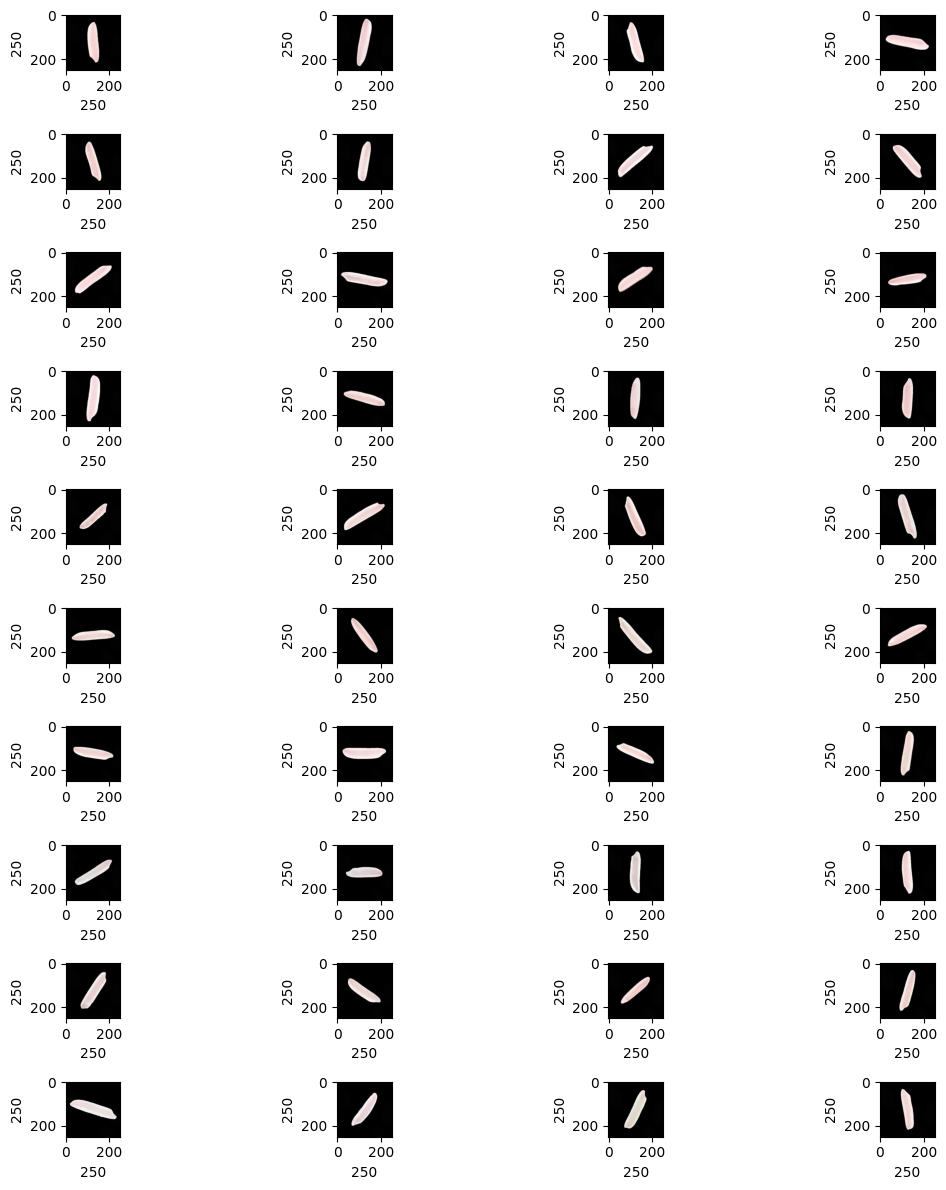

In [ ]:
# Reading and printing 40 random  Basmati rice IMAGES
plt.figure(figsize=(12,12))
path = "/content/Rice_grain/Basmati"
for i in range(1,41):
    plt.subplot(10,4,i)
    plt.tight_layout()
    rand_img = cv2.imread(path +'/'+ random.choice(sorted(os.listdir(path))))
    plt.imshow(rand_img)
    plt.xlabel(rand_img.shape[1], fontsize = 10)#width of image
    plt.ylabel(rand_img.shape[0], fontsize = 10)#height of image

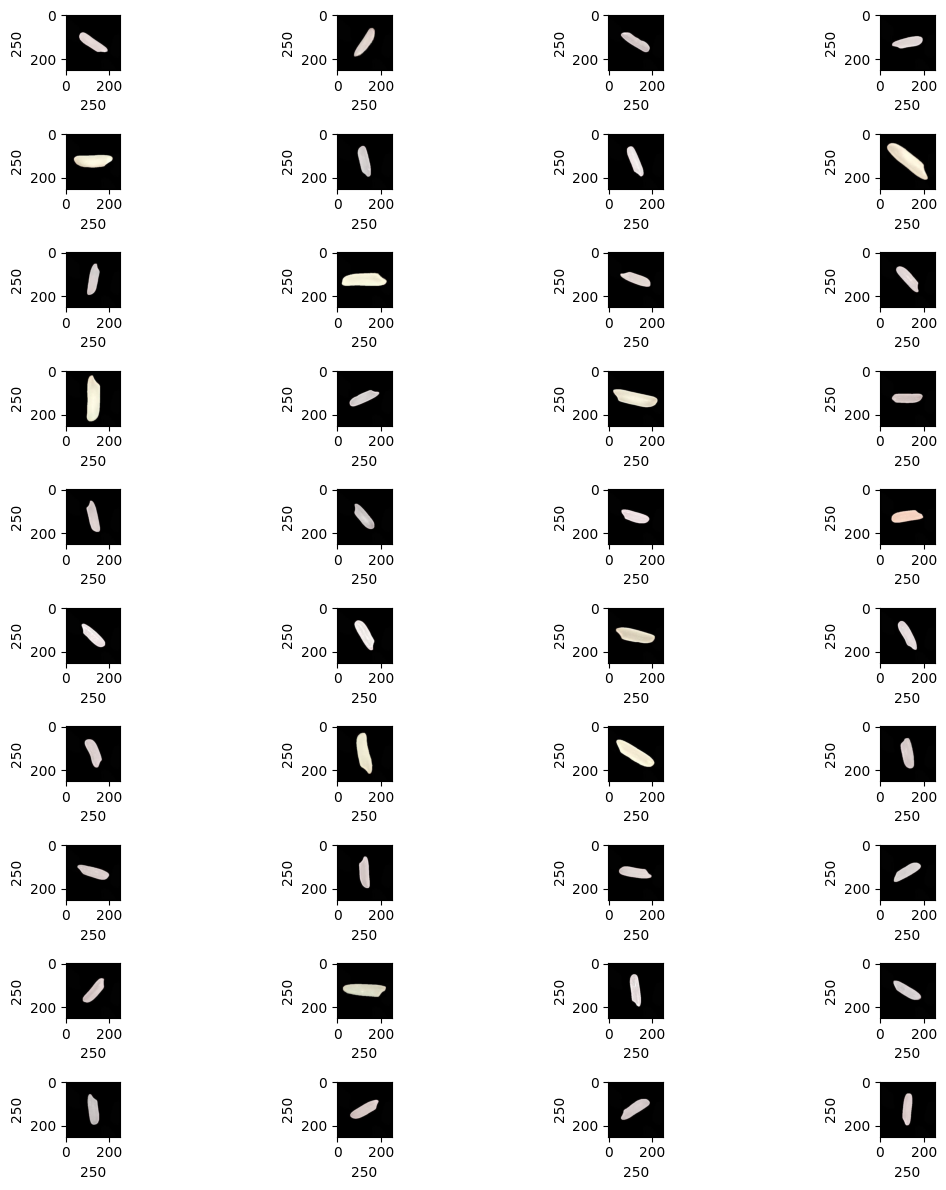

In [ ]:
# Reading and printing 40 random  Jasmine rice IMAGES
plt.figure(figsize=(12,12))
path = "/content/Rice_grain/Jasmine"
for i in range(1,41):
    plt.subplot(10,4,i)
    plt.tight_layout()
    rand_img = cv2.imread(path +'/'+ random.choice(sorted(os.listdir(path))))
    plt.imshow(rand_img)
    plt.xlabel(rand_img.shape[1], fontsize = 10)#width of image
    plt.ylabel(rand_img.shape[0], fontsize = 10)#height of image

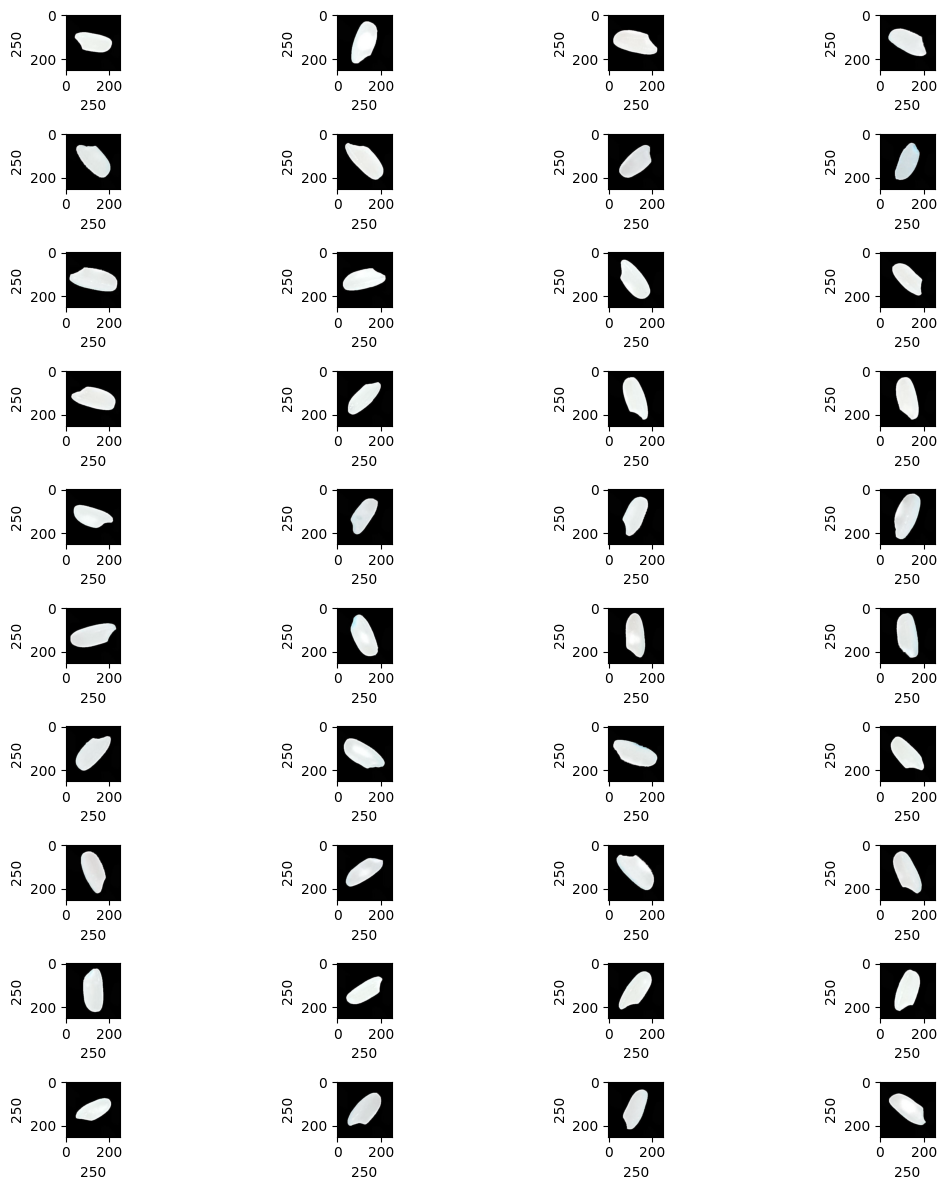

In [ ]:
# Reading and printing 40 random Ipsala Rice IMAGES
plt.figure(figsize=(12,12))
path = "/content/Rice_grain/Ipsala"
for i in range(1,41):
    plt.subplot(10,4,i)
    plt.tight_layout()
    rand_img = cv2.imread(path +'/'+ random.choice(sorted(os.listdir(path))))
    plt.imshow(rand_img)
    plt.xlabel(rand_img.shape[1], fontsize = 10)#width of image
    plt.ylabel(rand_img.shape[0], fontsize = 10)#height of image

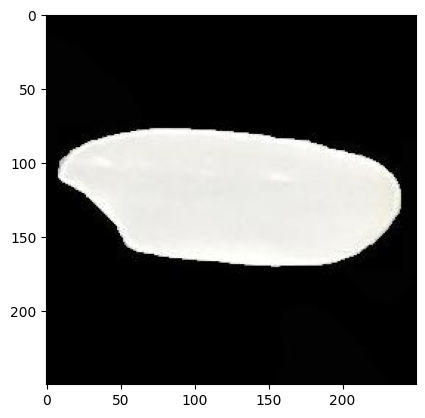

In [ ]:
# Another way to read specific Image
imre = plt.imread("/content/Rice_grain/Ipsala/Ipsala (1).jpg")
img1 = plt.imshow(imre)

In [ ]:
# shape of an image
imre.shape

(250, 250, 3)

## Another way to read and split the data into train and validation set

In [ ]:
# Images for training 
from keras.preprocessing.image import ImageDataGenerator
# Here we are doing 70/30 split
# 70% images for training the model and 30% images for model validation/model accuracy check
train_datagen = ImageDataGenerator(
    validation_split = .3,
    rescale = 1./255)

In [ ]:
# Images for validation
val_datagen = ImageDataGenerator(
    rescale = 1./255,
    validation_split = .3)

In [ ]:
# Creating train dataset
# Make sure you provide the same target size as initialied for the image size
train_set = train_datagen.flow_from_directory("/content/Rice_grain/",
                                              target_size = (250,250),
                                              color_mode = 'rgb',
                                              batch_size = 100,
                                              class_mode = 'categorical',
                                              subset = 'training')
# batch size 100 means 52500 images divided in 100 batch with batch size 525 
# once total 100 batch gives in training 1 iteration complete now same step for 2,3 and so on iteration

Found 52500 images belonging to 5 classes.


In [ ]:
# Creating validation dataset
val_set = val_datagen.flow_from_directory("/content/Rice_grain/",
                                            target_size = (250,250),
                                            color_mode = 'rgb',
                                            batch_size = 100,
                                            class_mode = 'categorical',
                                            subset = 'validation')
# same for validation means 22500 images divided in 100 batch with batch size 225

Found 22500 images belonging to 5 classes.


### Model Initialization :- 

In [ ]:
# initialize model 
model = Sequential()
# first convolution layer
model.add(Conv2D(filters=16, kernel_size=2, padding='same', activation='relu', input_shape=(250,250,3))) # 16 no. of filters of 2*2 matrix and input_shape is shape of image
model.add(MaxPooling2D(pool_size=2))
# second convolution layer
model.add(Conv2D(filters=32, kernel_size=2, padding='same', activation='relu', input_shape=(250,250,3))) # 32 no. of filters of 2*2 matrix and input_shape is shape of image
model.add(MaxPooling2D(pool_size=2))
# dropout layer to overcome of overfitting
model.add(Dropout(0.3)) # drop 30% info
# flattening
model.add(Flatten())

# Layers in ANN 
# hidden layer
model.add(Dense(500,activation='relu')) # Dense stands for hidden layer 500 neurons in hidden layer
model.add(Dropout(0.4)) # deactivating 40% of neurons
#ouput layer
model.add(Dense(5,activation='softmax')) # 5 neurons in output layer( Since we have 5 categories of Rice Grain)
# Summary about Model
model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 250, 250, 16)      208       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 125, 125, 16)     0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 125, 125, 32)      2080      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 dropout_2 (Dropout)         (None, 62, 62, 32)        0         
                                                                 
 flatten_1 (Flatten)         (None, 123008)           

In [ ]:
# compile the model 
# Here compilation is mainly for ANN 
# to define all these 3 parameters we use copiles
from keras.optimizers import Adam
model.compile(loss='categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [ ]:
# modelcheckpoint store the best model which gives less_loss and high accuracy in hdf5(hierarical data format version) form
from keras.callbacks import ModelCheckpoint
checkpointer=ModelCheckpoint(filepath='model.weights.best.hdf5',save_best_only=True)
# save_best_only is for only storing best model 

In [ ]:
# for printing  the traing time model took
from datetime import datetime

In [ ]:
# Training the model
start = datetime.now()
# Fitting the model 
hist = model.fit(train_set,epochs=10,validation_data=val_set,callbacks=[checkpointer],shuffle=True) # With shuffle=True you split the data randomly

duration = datetime.now() - start
print("Training completed in time: ", duration)

Epoch 1/10
525/525 [==============================] - 254s 475ms/step - loss: 0.1194 - accuracy: 0.9635 - val_loss: 0.1295 - val_accuracy: 0.9514
Epoch 2/10
525/525 [==============================] - 230s 438ms/step - loss: 0.0380 - accuracy: 0.9870 - val_loss: 0.0480 - val_accuracy: 0.9832
Epoch 3/10
525/525 [==============================] - 294s 561ms/step - loss: 0.0270 - accuracy: 0.9908 - val_loss: 0.0352 - val_accuracy: 0.9883
Epoch 4/10
525/525 [==============================] - 229s 437ms/step - loss: 0.0264 - accuracy: 0.9911 - val_loss: 0.0288 - val_accuracy: 0.9908
Epoch 5/10
525/525 [==============================] - 225s 429ms/step - loss: 0.0158 - accuracy: 0.9942 - val_loss: 0.0512 - val_accuracy: 0.9850
Epoch 6/10
525/525 [==============================] - 229s 437ms/step - loss: 0.0127 - accuracy: 0.9957 - val_loss: 0.0191 - val_accuracy: 0.9944
Epoch 7/10
525/525 [==============================] - 226s 430ms/step - loss: 0.0104 - accuracy: 0.9965 - val_loss: 0.0191 -

In [ ]:
# Accuracy of best fit model
score = model.evaluate(val_set,verbose=0)
accuracy = 100*score[1]
print('accuracy',accuracy)

accuracy 99.3244469165802


In [ ]:
# Parameters in model 
hist.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

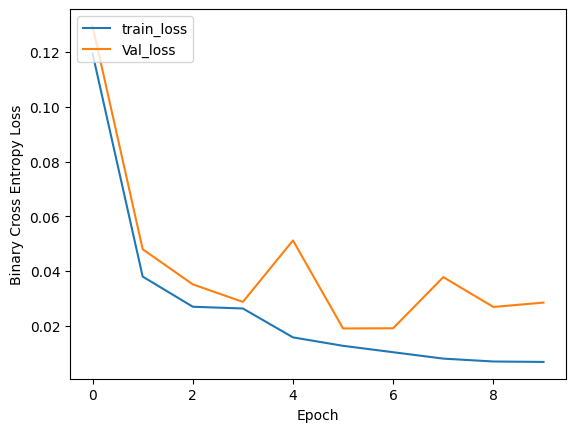

In [ ]:
# Ploting Train_loss v/s Validation_loss
plt.plot(hist.history['loss'], label='train_loss')
plt.plot(hist.history['val_loss'], label='Val_loss')
plt.ylabel('Binary Cross Entropy Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper left')

**Since we can see Miniumum difference between training loss and validation loss and we got the best model with 99.32 accuracy rate. So this could be the one of the best moddel for our dataset.**

**We can do number of trail and error approach by using different optimizers, increase or decrease layers in model, increase or decrease batch size, epoch values and get the good accuracy model**

**Refrences**
# https://www.v7labs.com/blog/neural-networks-activation-functions
#https://towardsdatascience.com/understanding-cnn-convolutional-neural-network-69fd626ee7d4
# https://towardsdatascience.com/overview-of-various-optimizers-in-neural-networks-17c1be2df6d5